In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
from IPython.display import display
from sklearn.externals import joblib

basepath = os.path.expanduser('../')

In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

## EDA Ideas

## Load Data

In [4]:
%%time

app_train   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_train.pkl'))
app_test    = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/application_test.pkl'))

# additional tables

# bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau.pkl'))
# bureau_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/bureau_balance.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/previous_application.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/installments_payments.pkl')) 
# pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/POS_CASH_balance.pkl'))
# credit_bal   = pd.read_pickle(os.path.join(basepath, 'data/interim/feature_groups/credit_card_balance.pkl'))

CPU times: user 93.8 ms, sys: 284 ms, total: 378 ms
Wall time: 3.34 s


In [5]:
app_train.TARGET.value_counts(normalize=True)

0.0    0.919271
1.0    0.080729
Name: TARGET, dtype: float64

In [8]:
print(app_train.shape, ' ', app_train.SK_ID_CURR.nunique())
display_all(app_train.head())

(307511, 122)   307511


,AMT_ANNUITY,AMT_CREDIT,AMT_GOODS_PRICE,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.024704,0.024994,0.025208,0.036896,0.036896,0.038300,0,1.0,M,0.014297,0.014397,0.014397,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.000000,0.000000,0.000000,No,0.068970,0.068970,0.068970,0.083008,0.262939,0.139404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,0.083313,0.083313,0.083313,0.125000,0.125000,0.125000,reg oper account,10,block of flats,0.036896,0.037506,0.037689,0,0,0.020203,0.020493,0.022003,0.018997,0.019302,0.019806,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018799,2,2,0,0,0,0,100002,1.0,0.014900,"Stone, brick",WEDNESDAY,0.972168,0.972168,0.972168,0.619141,0.624512,0.634277
1,35698.5,1293502.5,1129500.0,270000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.095886,0.096802,0.092407,0.052887,0.052887,0.053802,0,2.0,F,0.060486,0.060791,0.049713,-16765,-1188,-291,-828.0,-1186.0,0.0,0.0,0.080017,0.080017,0.080627,No,0.034485,0.034485,0.034485,0.311279,0.622070,NaN,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,N,1,0,0.291748,0.291748,0.291748,0.333252,0.333252,0.333252,reg oper account,11,block of flats,0.013000,0.013199,0.012802,0,0,0.077271,0.078674,0.078979,0.054901,0.055786,0.055389,Cash loans,Higher education,Married,House / apartment,State servant,Family,0.003901,0.003901,0.0,0.009804,0.010002,0.0,1.0,1.0,Core staff,School,NaN,0.003542,1,1,0,0,0,0,100003,0.0,0.071411,Block,MONDAY,0.984863,0.984863,0.984863,0.795898,0.798828,0.804199
2,6750.0,135000.0,135000.0,67500.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0,1.0,M,NaN,NaN,NaN,-19046,-225,-2531,-815.0,-4260.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.556152,0.729492,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,

In [10]:
print(prev_app.shape, ' ', prev_app.SK_ID_CURR.nunique(), ' ', prev_app.SK_ID_PREV.nunique())
display_all(prev_app.head())

(1670214, 37)   338857   1670214


,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430054,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182861,0.867188,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615234,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735352,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335938,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.394531,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
app_train.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.904787
Revolving loans    0.095213
Name: NAME_CONTRACT_TYPE, dtype: float64

In [16]:
app_test.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.990994
Revolving loans    0.009006
Name: NAME_CONTRACT_TYPE, dtype: float64

In [18]:
prev_app.NAME_CONTRACT_TYPE.value_counts(normalize=True)

Cash loans         0.447579
Consumer loans     0.436561
Revolving loans    0.115652
XNA                0.000207
Name: NAME_CONTRACT_TYPE, dtype: float64

In [20]:
app_train.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      53901
WEDNESDAY    51934
MONDAY       50714
THURSDAY     50591
FRIDAY       50338
SATURDAY     33852
SUNDAY       16181
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [19]:
prev_app.WEEKDAY_APPR_PROCESS_START.value_counts()

TUESDAY      255118
WEDNESDAY    255010
MONDAY       253557
FRIDAY       252048
THURSDAY     249099
SATURDAY     240631
SUNDAY       164751
Name: WEEKDAY_APPR_PROCESS_START, dtype: int64

In [28]:
app_train.CODE_GENDER.head(2)

0    M
1    F
Name: CODE_GENDER, dtype: category
Categories (3, object): [F, M, XNA]

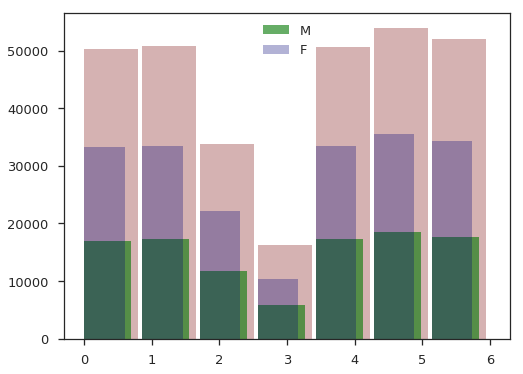

In [40]:
plt.figure(figsize=(8, 6))
plt.hist(app_train.WEEKDAY_APPR_PROCESS_START.cat.codes.values, bins=7, alpha=.3, color='#770000', width=.8);
plt.hist(app_train[app_train.CODE_GENDER == 'M'].WEEKDAY_APPR_PROCESS_START.cat.codes.values, bins=7, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(app_train[app_train.CODE_GENDER == 'F'].WEEKDAY_APPR_PROCESS_START.cat.codes.values, bins=7, alpha=.3, label='F', color='#000077', width=.6)

plt.legend(loc='best');

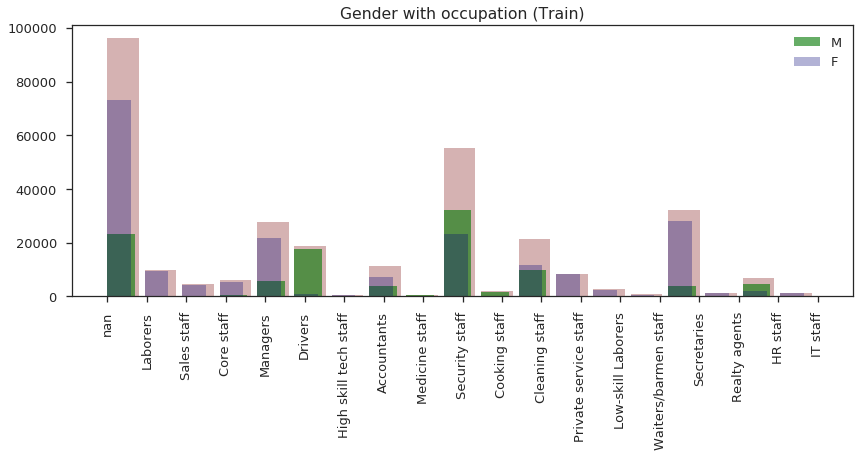

In [6]:
plt.figure(figsize=(14, 5))
plt.hist(app_train.OCCUPATION_TYPE.cat.codes.values, bins=19, alpha=.3, color='#770000', width=.8);
plt.hist(app_train[app_train.CODE_GENDER == 'M'].OCCUPATION_TYPE.cat.codes.values, bins=19, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(app_train[app_train.CODE_GENDER == 'F'].OCCUPATION_TYPE.cat.codes.values, bins=19, alpha=.3, label='F', color='#000077', width=.6)
plt.xticks(np.arange(-1, 18), app_train.OCCUPATION_TYPE.value_counts(dropna=False).index.values, rotation=90)
plt.title('Gender with occupation (Train)')
plt.legend(loc='best');

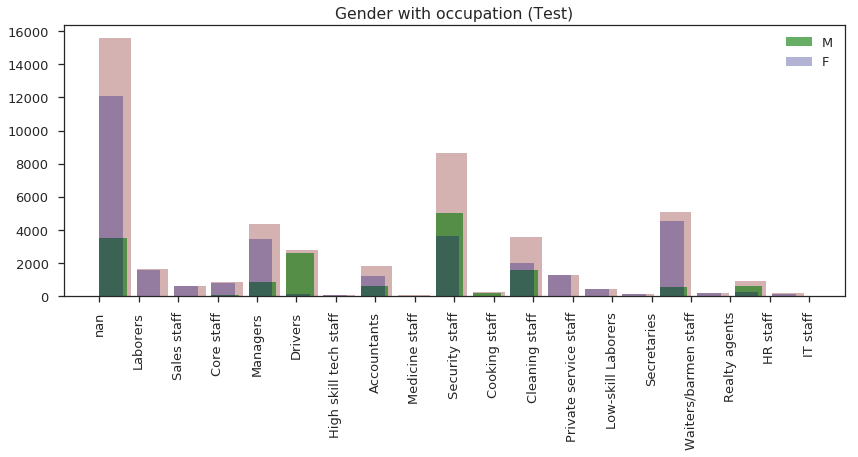

In [7]:
plt.figure(figsize=(14, 5))
plt.hist(app_test.OCCUPATION_TYPE.cat.codes.values, bins=19, alpha=.3, color='#770000', width=.8);
plt.hist(app_test[app_test.CODE_GENDER == 'M'].OCCUPATION_TYPE.cat.codes.values, bins=19, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(app_test[app_test.CODE_GENDER == 'F'].OCCUPATION_TYPE.cat.codes.values, bins=19, alpha=.3, label='F', color='#000077', width=.6)
plt.xticks(np.arange(-1, 18), app_test.OCCUPATION_TYPE.value_counts(dropna=False).index.values, rotation=90)
plt.title('Gender with occupation (Test)')
plt.legend(loc='best');

In [8]:
# table
table = pd.merge(app_train, prev_app, on='SK_ID_CURR', how='left')
display_all(table.head())

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START_x,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_x,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE_x,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START_x,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.024704,0.024994,0.025208,0.036896,0.036896,0.038300,0,1.0,M,0.014297,0.014397,0.014397,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.000000,0.000000,0.000000,No,0.068970,0.068970,0.068970,0.083008,0.262939,0.139404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,0.083313,0.083313,0.083313,0.125000,0.125000,0.125000,reg oper account,10,block of flats,0.036896,0.037506,0.037689,0,0,0.020203,0.020493,0.022003,0.018997,0.019302,0.019806,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018799,2,2,0,0,0,0,100002,1.0,0.014900,"Stone, brick",WEDNESDAY,0.972168,0.972168,0.972168,0.619141,0.624512,0.634277,1038818.0,Consumer loans,9251.775391,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,35698.5,1293502.5,11295

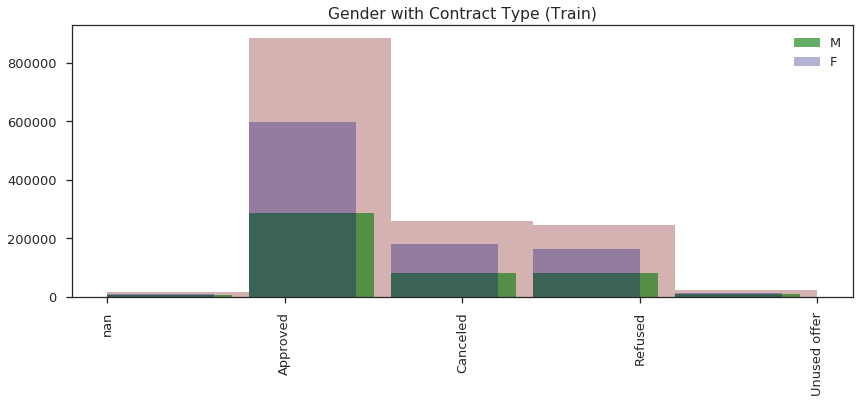

In [30]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_CONTRACT_STATUS.cat.codes.values, bins=5, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_CONTRACT_STATUS.cat.codes.values, bins=5, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_CONTRACT_STATUS.cat.codes.values, bins=5, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 4), table.NAME_CONTRACT_STATUS.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Contract Type (Train)')
plt.legend(loc='best');

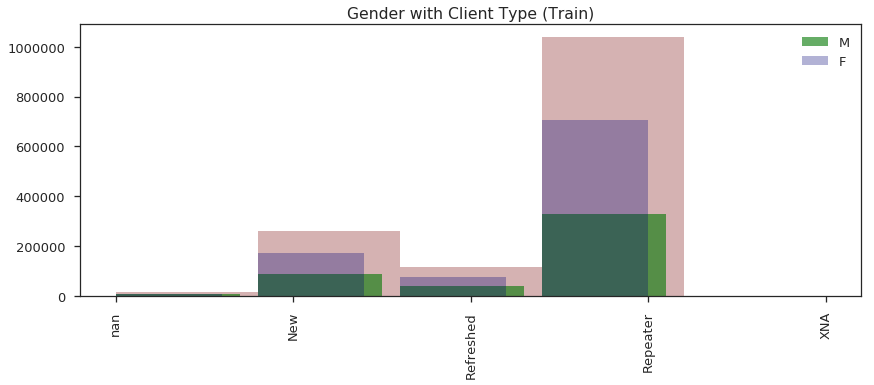

In [34]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_CLIENT_TYPE.cat.codes.values, bins=5, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_CLIENT_TYPE.cat.codes.values, bins=5, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_CLIENT_TYPE.cat.codes.values, bins=5, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 4), table.NAME_CLIENT_TYPE.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Client Type (Train)')
plt.legend(loc='best');

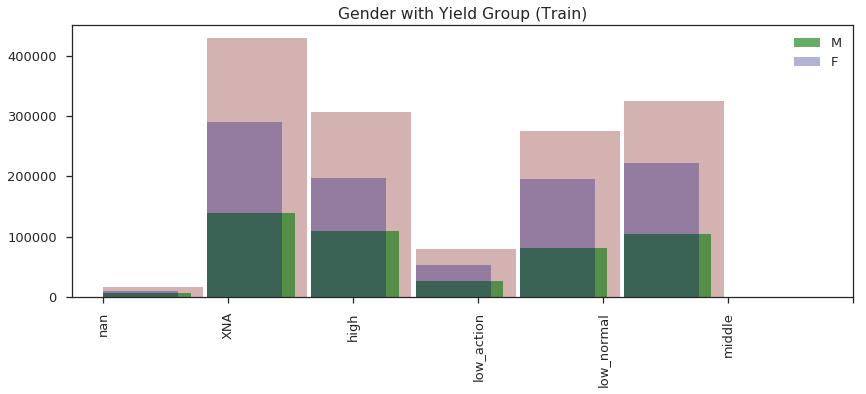

In [39]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_YIELD_GROUP.cat.codes.values, bins=6, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_YIELD_GROUP.cat.codes.values, bins=6, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_YIELD_GROUP.cat.codes.values, bins=6, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 6), table.NAME_YIELD_GROUP.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Yield Group (Train)')
plt.legend(loc='best');

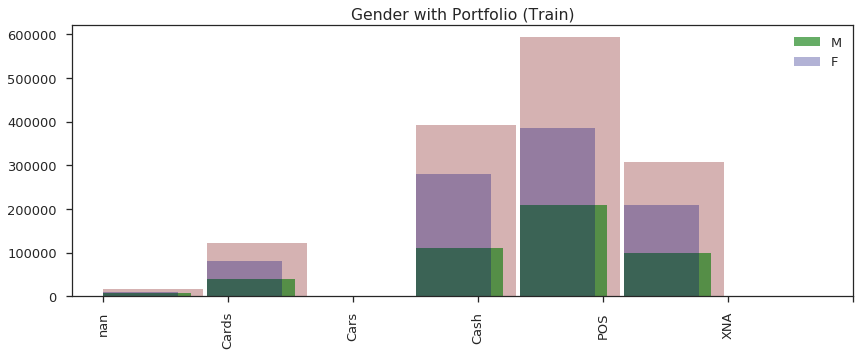

In [48]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_PORTFOLIO.cat.codes.values, bins=6, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_PORTFOLIO.cat.codes.values, bins=6, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_PORTFOLIO.cat.codes.values, bins=6, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 6), table.NAME_PORTFOLIO.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Portfolio (Train)')
plt.legend(loc='best');

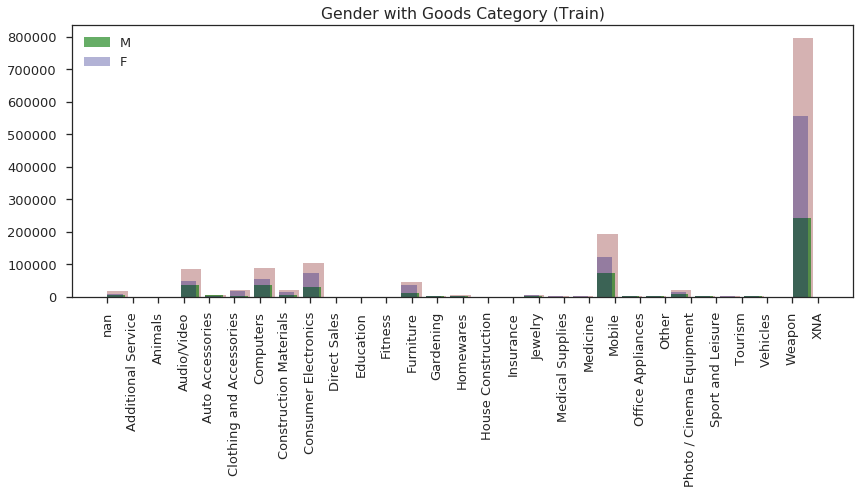

In [47]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_GOODS_CATEGORY.cat.codes.values, bins=29, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_GOODS_CATEGORY.cat.codes.values, bins=29, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_GOODS_CATEGORY.cat.codes.values, bins=29, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 28), table.NAME_GOODS_CATEGORY.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Goods Category (Train)')
plt.legend(loc='best');

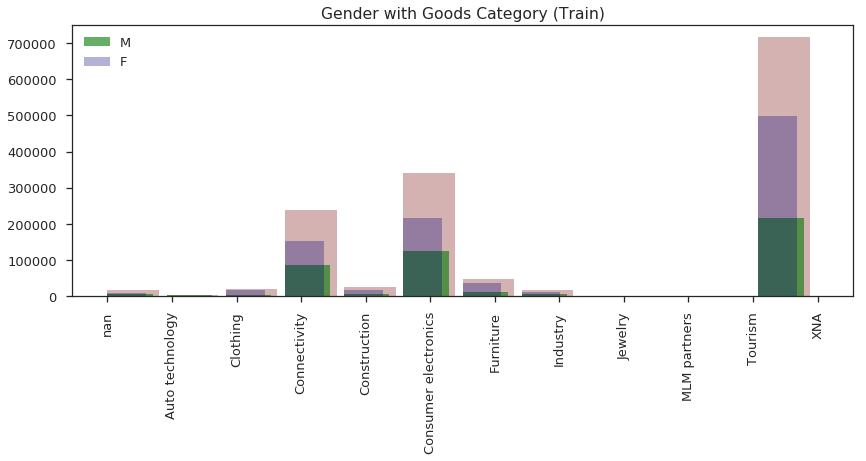

In [51]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_SELLER_INDUSTRY.cat.codes.values, bins=12, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_SELLER_INDUSTRY.cat.codes.values, bins=12, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_SELLER_INDUSTRY.cat.codes.values, bins=12, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 11), table.NAME_SELLER_INDUSTRY.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Goods Category (Train)')
plt.legend(loc='best');

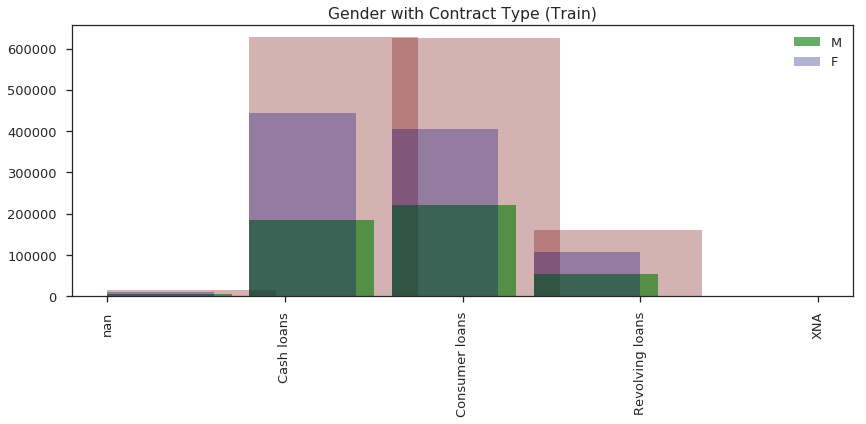

In [67]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_CONTRACT_TYPE_y.cat.codes.values, bins=5, alpha=.3, color='#770000', width=.95);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_CONTRACT_TYPE_y.cat.codes.values, bins=5, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_CONTRACT_TYPE_y.cat.codes.values, bins=5, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 4), table.NAME_CONTRACT_TYPE_y.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Contract Type (Train)')
plt.legend(loc='best');

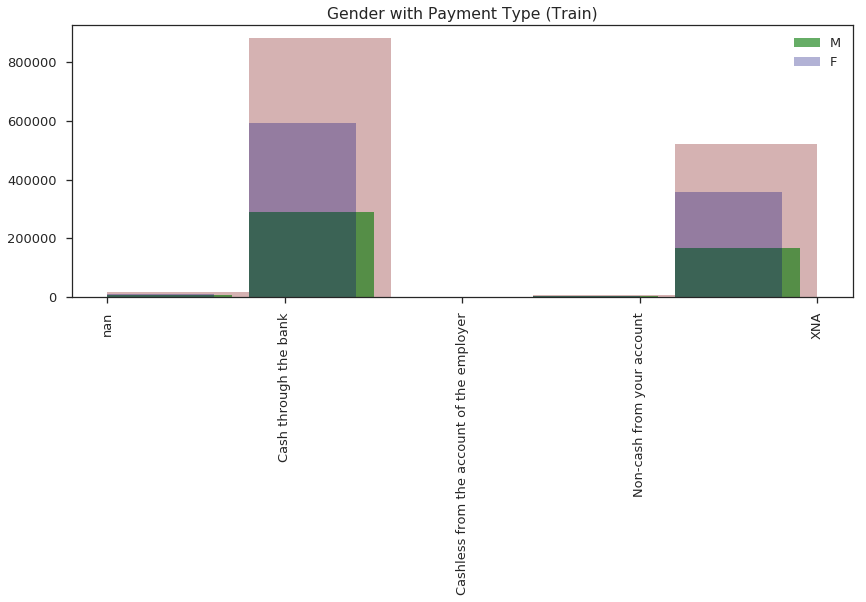

In [58]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_PAYMENT_TYPE.cat.codes.values, bins=5, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_PAYMENT_TYPE.cat.codes.values, bins=5, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_PAYMENT_TYPE.cat.codes.values, bins=5, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 4), table.NAME_PAYMENT_TYPE.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Payment Type (Train)')
plt.legend(loc='best');

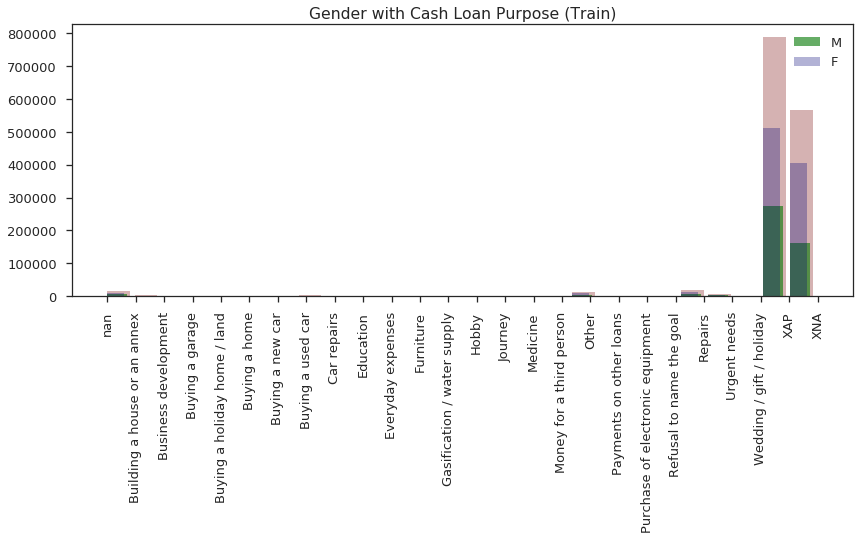

In [60]:
plt.figure(figsize=(14, 5))
plt.hist(table.NAME_CASH_LOAN_PURPOSE.cat.codes.values, bins=26, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].NAME_CASH_LOAN_PURPOSE.cat.codes.values, bins=26, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].NAME_CASH_LOAN_PURPOSE.cat.codes.values, bins=26, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 25), table.NAME_CASH_LOAN_PURPOSE.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Cash Loan Purpose (Train)')
plt.legend(loc='best');

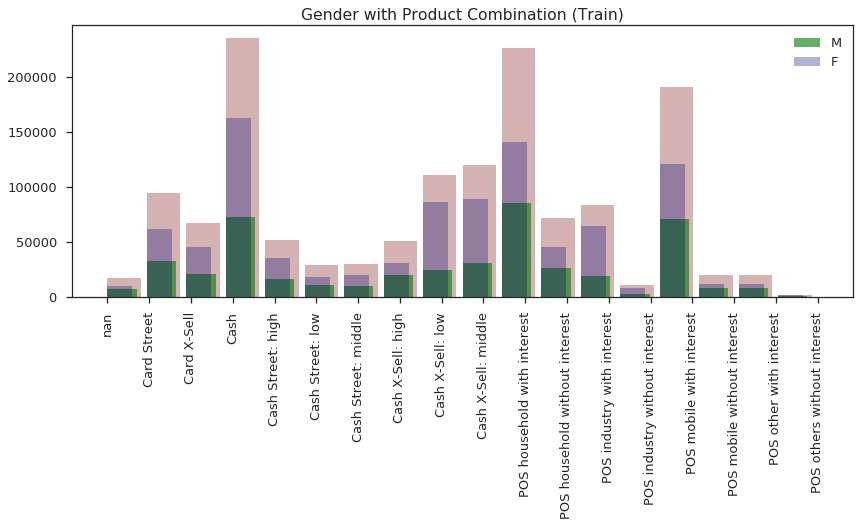

In [62]:
plt.figure(figsize=(14, 5))
plt.hist(table.PRODUCT_COMBINATION.cat.codes.values, bins=18, alpha=.3, color='#770000', width=.8);
plt.hist(table[table.CODE_GENDER == 'M'].PRODUCT_COMBINATION.cat.codes.values, bins=18, alpha=.6, label='M', color='#007700', width=.7)
plt.hist(table[table.CODE_GENDER == 'F'].PRODUCT_COMBINATION.cat.codes.values, bins=18, alpha=.3, label='F', color='#000077', width=.6);
plt.xticks(np.arange(-1, 17), table.PRODUCT_COMBINATION.value_counts(dropna=False).sort_index().index.values, rotation=90)
plt.title('Gender with Product Combination (Train)')
plt.legend(loc='best');

In [68]:
display_all(table.head())

,AMT_ANNUITY_x,AMT_CREDIT_x,AMT_GOODS_PRICE_x,AMT_INCOME_TOTAL,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_YEAR,APARTMENTS_AVG,APARTMENTS_MEDI,APARTMENTS_MODE,BASEMENTAREA_AVG,BASEMENTAREA_MEDI,BASEMENTAREA_MODE,CNT_CHILDREN,CNT_FAM_MEMBERS,CODE_GENDER,COMMONAREA_AVG,COMMONAREA_MEDI,COMMONAREA_MODE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_LAST_PHONE_CHANGE,DAYS_REGISTRATION,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,ELEVATORS_AVG,ELEVATORS_MEDI,ELEVATORS_MODE,EMERGENCYSTATE_MODE,ENTRANCES_AVG,ENTRANCES_MEDI,ENTRANCES_MODE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,FLAG_CONT_MOBILE,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_2,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_EMAIL,FLAG_EMP_PHONE,FLAG_MOBIL,FLAG_OWN_CAR,FLAG_OWN_REALTY,FLAG_PHONE,FLAG_WORK_PHONE,FLOORSMAX_AVG,FLOORSMAX_MEDI,FLOORSMAX_MODE,FLOORSMIN_AVG,FLOORSMIN_MEDI,FLOORSMIN_MODE,FONDKAPREMONT_MODE,HOUR_APPR_PROCESS_START_x,HOUSETYPE_MODE,LANDAREA_AVG,LANDAREA_MEDI,LANDAREA_MODE,LIVE_CITY_NOT_WORK_CITY,LIVE_REGION_NOT_WORK_REGION,LIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAREA_AVG,LIVINGAREA_MEDI,LIVINGAREA_MODE,NAME_CONTRACT_TYPE_x,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,NAME_INCOME_TYPE,NAME_TYPE_SUITE_x,NONLIVINGAPARTMENTS_AVG,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_AVG,NONLIVINGAREA_MEDI,NONLIVINGAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,OCCUPATION_TYPE,ORGANIZATION_TYPE,OWN_CAR_AGE,REGION_POPULATION_RELATIVE,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,SK_ID_CURR,TARGET,TOTALAREA_MODE,WALLSMATERIAL_MODE,WEEKDAY_APPR_PROCESS_START_x,YEARS_BEGINEXPLUATATION_AVG,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_AVG,YEARS_BUILD_MEDI,YEARS_BUILD_MODE,SK_ID_PREV,NAME_CONTRACT_TYPE_y,AMT_ANNUITY_y,AMT_APPLICATION,AMT_CREDIT_y,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_y,WEEKDAY_APPR_PROCESS_START_y,HOUR_APPR_PROCESS_START_y,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE_y,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,24700.5,406597.5,351000.0,202500.0,0.0,0.0,0.0,0.0,0.0,1.0,0.024704,0.024994,0.025208,0.036896,0.036896,0.038300,0,1.0,M,0.014297,0.014397,0.014397,-9461,-637,-2120,-1134.0,-3648.0,2.0,2.0,0.000000,0.000000,0.000000,No,0.068970,0.068970,0.068970,0.083008,0.262939,0.139404,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,N,Y,1,0,0.083313,0.083313,0.083313,0.125000,0.125000,0.125000,reg oper account,10,block of flats,0.036896,0.037506,0.037689,0,0,0.020203,0.020493,0.022003,0.018997,0.019302,0.019806,Cash loans,Secondary / secondary special,Single / not married,House / apartment,Working,Unaccompanied,0.000000,0.000000,0.0,0.000000,0.000000,0.0,2.0,2.0,Laborers,Business Entity Type 3,NaN,0.018799,2,2,0,0,0,0,100002,1.0,0.014900,"Stone, brick",WEDNESDAY,0.972168,0.972168,0.972168,0.619141,0.624512,0.634277,1038818.0,Consumer loans,9251.775391,179055.0,179055.0,0.0,179055.0,SATURDAY,9.0,Y,1.0,0.000000,NaN,NaN,XAP,Approved,-606.0,XNA,XAP,NaN,New,Vehicles,POS,XNA,Stone,500.0,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,35698.5,1293502.5,11295

In [ ]:
tmp = table.loc[table.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'AMT_CREDIT_y', 'AMT_ANNUITY_y', 'TARGET']]
tmp.loc[:, 'ratio'] = tmp.AMT_CREDIT_y / tmp.AMT_ANNUITY_y

tmp = tmp.groupby('SK_ID_CURR')

f1 = tmp['ratio'].count().values
f2 = tmp['ratio'].skew().values
g  = tmp.TARGET.mean()

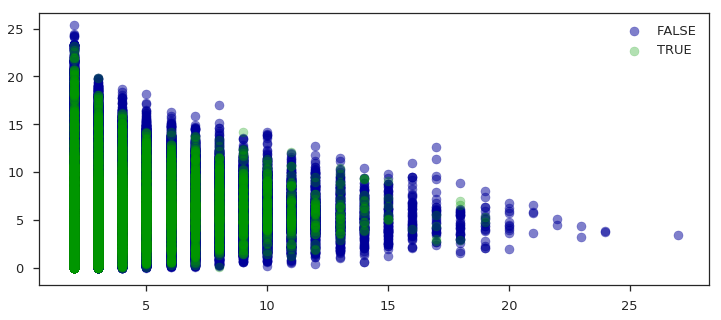

In [185]:
plt.figure(figsize=(12, 5))
plt.scatter(f1[g==0], f2[g==0], c='#000099', alpha=.5, label='FALSE')
plt.scatter(f1[g==1], f2[g==1], c='#009900', alpha=.3, label='TRUE')

plt.legend();